In [3]:
import numpy as np

print("Hello")

Hello


In this code we printed out a "Hello" command

Reply...

In [5]:
# Importing numpy
import numpy as np

# Consider an example matrix
A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)

# Measure the shape of A: which is the maximum rank?
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

The shape of A is: (10, 6).
(10, 10) (6,) (6, 6)


In [6]:
# Exercise: prove that U and VT are orthogonal matrices, i.e. U @ U^T = I and VT @ VT^T = I
print(np.linalg.norm(U @ U.T - np.eye(m))) # U @ U^T = I <-> U @ U.T - I = 0 <-> || U @ U.T - I || = 0
print(np.linalg.norm(VT @ VT.T - np.eye(n))) 

1.433118328027982e-15
1.1576751205347359e-15


In [9]:
print(s)
# We expect is that rank(A) = 6 <- analytic rank

print(np.linalg.matrix_rank(A))
print(help(np.linalg.matrix_rank))

[1.32720236e+01 1.03590904e+01 6.02367888e+00 2.87366090e+00
 1.07247430e-15 4.56866472e-16]
4
Help on _ArrayFunctionDispatcher in module numpy.linalg:

matrix_rank(A, tol=None, hermitian=False)
    Return matrix rank of array using SVD method
    
    Rank of the array is the number of singular values of the array that are
    greater than `tol`.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    A : {(M,), (..., M, N)} array_like
        Input vector or stack of matrices.
    tol : (...) array_like, float, optional
        Threshold below which SVD values are considered zero. If `tol` is
        None, and ``S`` is an array with singular values for `M`, and
        ``eps`` is the epsilon value for datatype of ``S``, then `tol` is
        set to ``S.max() * max(M, N) * eps``.
    
        .. versionchanged:: 1.14
           Broadcasted against the stack of matrices
    hermitian : bool, optional
        If True, `A` is 

Shape of the image: (512, 512).


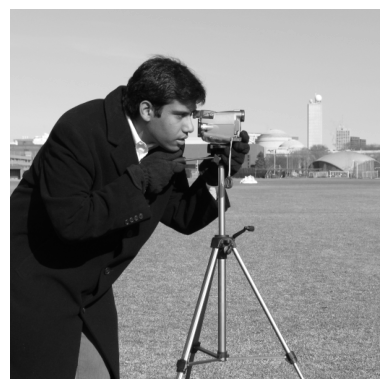

In [16]:
import skimage

# Loading the "cameraman" image
x = skimage.data.camera()
m, n = x.shape

# Printing its shape
print(f"Shape of the image: {x.shape}.")

# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(x, cmap="gray") # plt.plot(..)
plt.axis("off")
# some specifications here
plt.show()

In [17]:
print(f"The number of bytes required to memorize the image x is: {512 * 512}.")

The number of bytes required to memorize the image x is: 262144.


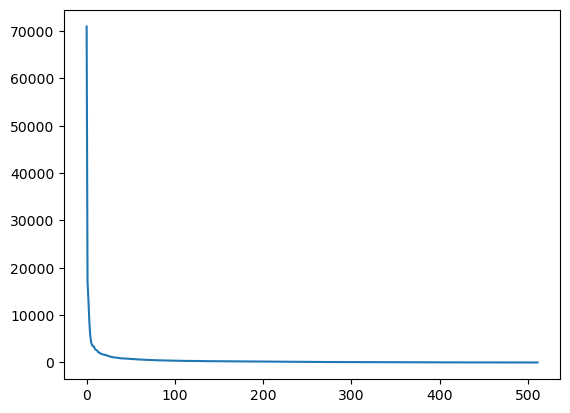

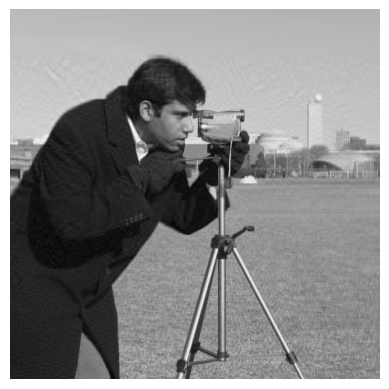

The number of bytes required to save Xk is 82000.
(512, 512)


In [25]:
# Compute the SVD of x
U, s, VT = np.linalg.svd(x, full_matrices=True)

# Visualize the vector s
plt.plot(s)
plt.show()

# Build the full diagonal matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

# Define k
k = 80

# Truncate the SVD decomposition up to k
Uk = U[:, :k]   # m x k
Sk = S[:k, :k]  # k x k
VTk = VT[:k, :] # k x n

# Compute Xk
Xk = Uk @ Sk @ VTk # k-rank approximation of X

plt.imshow(Xk, cmap="gray") # plt.plot(..)
plt.axis("off")
# some specifications here
plt.show()

print(f"The number of bytes required to save Xk is {k * (m + n + 1)}.")
print(Xk.shape)

In [26]:
import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('./train.csv')
print(data.shape)

(42000, 785)


In [29]:
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 42000) (42000,)


(28, 28)


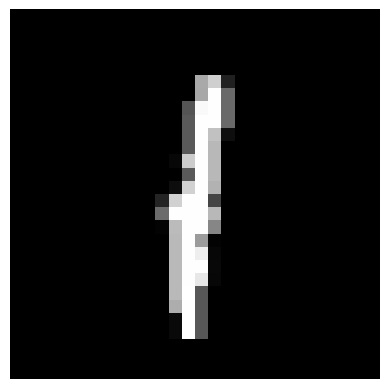

1


In [37]:
# Extract a single element from X
x = X[:, 12]
y = Y[12]

# Reshape it into the original 28 x 28 image
x = np.reshape(x, (28, 28))
print(x.shape)

# Visualize it
plt.imshow(x, cmap="gray")
plt.axis('off')
plt.show()

print(y)

In [38]:
# sklearn -> (split, PCA, ..) DON'T USE IT
def split_data(X, Y, Ntrain):
    d, N = X.shape

    # Randomize
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    # Extract the training set
    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    # Extract the test set
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 30_000)

print(Xtrain.shape, Xtest.shape)

(784, 30000) (784, 12000)


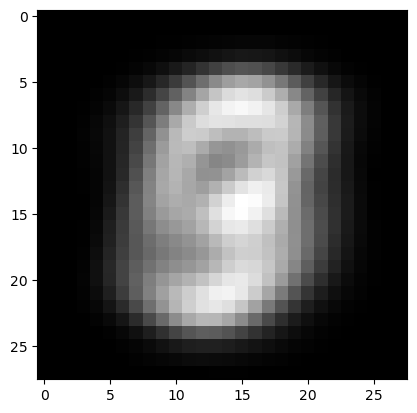

(784, 784) (784,) (784, 30000)


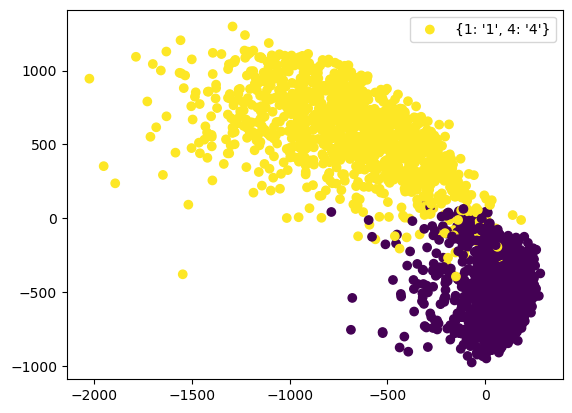

In [58]:
# First set: Center the data
cX = np.mean(Xtrain, axis=1)

# Make cX a column vector (instead of an abstract vector)
cX = np.reshape(cX, (784, 1))

plt.imshow(np.reshape(cX, (28, 28)), cmap='gray')
plt.show()

# Compute Xc = X - cX
Xc = Xtrain - cX

# Step 2: Compute the SVD
U, s, VT = np.linalg.svd(Xc, full_matrices=False)
print(U.shape, s.shape, VT.shape)

# Step3 : comput the truncated version of SVD
k = 2
 
Uk = U[:, :k]
P = Uk.T
 
Z = P @ Xtest

mine = (Ytest == 1) | (Ytest == 4)
 
plt.scatter(Z[0, mine], Z[1, mine], c=Ytest[mine], label={1:"1", 4:"4"})
plt.legend()
plt.show()